<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import-&amp;-Load-data" data-toc-modified-id="Import-&amp;-Load-data-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Import &amp; Load data</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Target-variable---revenue" data-toc-modified-id="Target-variable---revenue-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Target variable - revenue</a></span></li><li><span><a href="#Variable-Types" data-toc-modified-id="Variable-Types-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variable Types</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Relationship-between-missing-data-and-Revenue-(target)" data-toc-modified-id="Relationship-between-missing-data-and-Revenue-(target)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Relationship between missing data and Revenue (target)</a></span></li><li><span><a href="#Numerical-variables" data-toc-modified-id="Numerical-variables-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Numerical variables</a></span></li><li><span><a href="#Temporal-variables" data-toc-modified-id="Temporal-variables-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Temporal variables</a></span></li></ul></li></ul></div>

# TMDB_EDA_FeatureEngineering

### Introduction

In the previous notebook (TMDB_Cleaning_FeatureEngineering.ipynb), I cleaned dataset and extracted useful information from original variables and created new features. 

In this notebook, I will explore the cleaned dataset, and create some visualizations to see ditributions, the correlations between variables. If necessary, I will perform feature engineering. 

### Import & Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB'

In [2]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB/datasets')

In [3]:
data = pd.read_csv(path/'cleaned_train.csv')
print(data.shape)
data.head()

(3000, 19)


,id,budget,popularity,runtime,revenue,is_collection,num_genres,is_homepage,is_English,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_cast,num_crew,release_month,release_day,release_year,release_dayofweek
0,1,14000000.0,6.575393,93.0,12314651,1,1,0,1,3,1,1,<5,24,medium,2,20,2015,4
1,2,40000000.0,8.248895,113.0,95149435,1,4,0,1,1,1,1,<5,20,small,8,6,2004,4
2,3,3300000.0,64.299990,105.0,13092000,0,1,1,1,3,1,1,<15,51,medium,10,10,2014,4
3,4,1200000.0,3.174936,122.0,16000000,0,2,1,0,NaN,1,2,<10,7,small,3,9,2012,4
4,5,NaN,1.148070,118.0,3923970,0,2,0,0,NaN,1,1,<5,4,small,2,5,2009,3


In [4]:
data_test = pd.read_csv(path/'cleaned_test.csv')

## EDA

### Target variable - revenue

Let's start exploring the target distribution

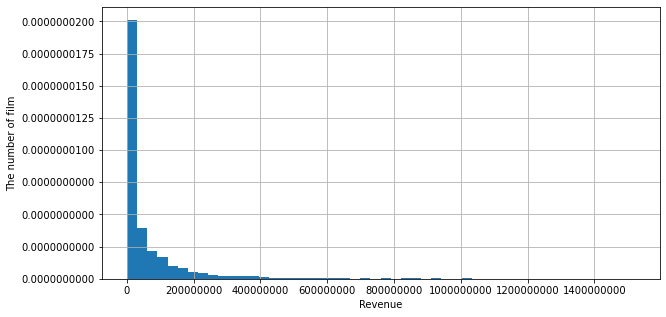

In [5]:
ax = data['revenue'].hist(bins=50, density=True, figsize=(10,5))
ax.set_ylabel('The number of film')
ax.set_xlabel('Revenue')
ax.ticklabel_format(style='plain')
plt.show()

We can see the target is continuous variable, and the distribution is skewed towards the right. 

We can improve the value spread with a log transformation

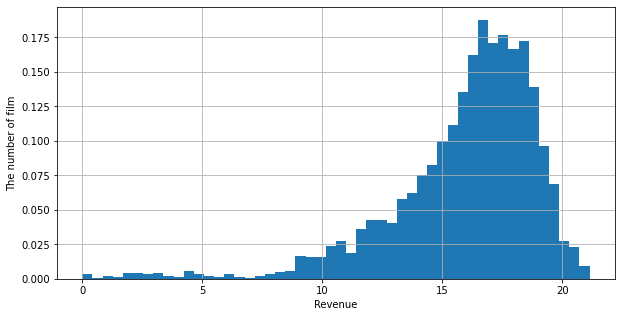

In [6]:
ax = np.log(data['revenue']).hist(bins=50, density=True, figsize=(10,5))
ax.set_ylabel('The number of film')
ax.set_xlabel('Revenue')
ax.ticklabel_format(style='plain')
plt.show()

Even though it is still skewed towards the left, this distribution looks more Gaussian

### Variable Types

Let's identify the categorical and numerical variables.

In [7]:
data.head(2)

,id,budget,popularity,runtime,revenue,is_collection,num_genres,is_homepage,is_English,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_cast,num_crew,release_month,release_day,release_year,release_dayofweek
0,1,14000000.0,6.575393,93.0,12314651,1,1,0,1,3,1,1,<5,24,medium,2,20,2015,4
1,2,40000000.0,8.248895,113.0,95149435,1,4,0,1,1,1,1,<5,20,small,8,6,2004,4


We can say `is_collection`, `is_homepage`, `is_English` are binary variables even though their dtypes are int64. Also, datetime values including year, month, dayofweek should be categorical variables. 

We need to change the dtypes of those variables I just mentioned

In [8]:
change_cols = ['is_collection', 'is_homepage', 'is_English', 'release_year', 'release_month', 'release_day', 'release_dayofweek']

for col in change_cols:
    data[col] = data[col].astype('O')
    data_test[col] = data_test[col].astype('O')

Let's create two lists of categorical and numerical variables

In [9]:
# create two lists for categorical and numerical variables
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']
num_vars = [var for var in data.columns if var != 'revenue' and var != 'id' and var not in cat_vars]

print('The number of categorical variables: {}'.format(len(cat_vars)))
print('The number of numerical variables: {}'.format(len(num_vars)))

The number of categorical variables: 13
The number of numerical variables: 4


### Missing values

Let's find out which variables contain missing values

In [10]:
# make a list of the variables that have missing values
vars_with_na = [var for var in data.columns if data[var].isnull().mean()>0]

# explore percentage of missing values
data.isnull().mean().sort_values(ascending=False)

budget               0.270667
num_pro_comps        0.052000
num_spoken_lang      0.006667
runtime              0.004667
num_genres           0.002333
release_year         0.000000
release_day          0.000000
release_month        0.000000
num_crew             0.000000
num_cast             0.000000
num_keywords         0.000000
id                   0.000000
num_pro_count        0.000000
is_English           0.000000
is_homepage          0.000000
is_collection        0.000000
revenue              0.000000
popularity           0.000000
release_dayofweek    0.000000
dtype: float64

There are 5 variables with a small percentage of missing values. In order to train a machine learning model, we need to impute the missing data in thses variables.

In [11]:
# Determine which variables are numerical or which are categorical
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('The number of categorical variables with na: ', len(cat_na))
print('The number of numerical variables with na: ', len(num_na))

The number of categorical variables with na:  3
The number of numerical variables with na:  2


In [12]:
cat_na

['num_genres', 'num_pro_comps', 'num_spoken_lang']

In [13]:
num_na

['budget', 'runtime']

### Relationship between missing data and Revenue (target)

Let's evalute the revenue of the file in those observations where the information is misisng. 

In [14]:
def analyze_na_value(df, var):
    """ Function to evaluate the relationship between missing data and target variable"""
    # copy dataframe, so that we do not override the original data. 
    df = df.copy()
    
    # Make an interim variable that indicates 1 
    # if the value was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # determin the median revenue in the groups 1 and 0,
    # and the standard deviation of the revenue, 
    # and capture the results in a temporary dataset
    tmp = df.groupby([var])['revenue'].agg(['mean', 'std'])
    
    # plot into a bar graph
    tmp.plot(kind='barh', y='mean', legend=False,
            xerr='std', title='Revenue')
    
    plt.show()

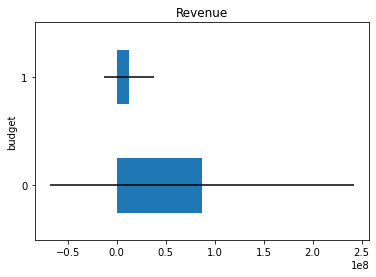

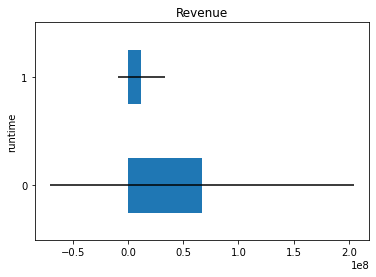

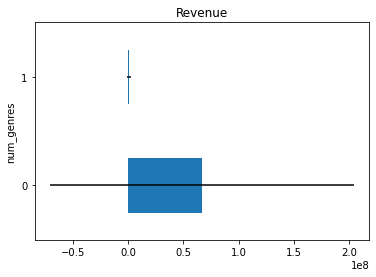

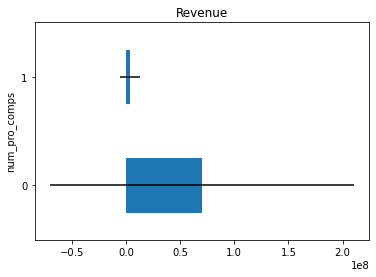

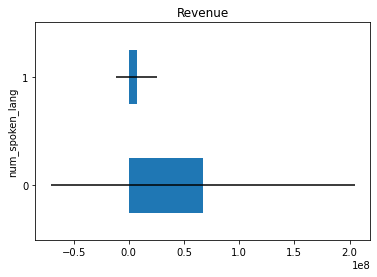

In [15]:
# run the funtion on each variable with missing data

for var in vars_with_na:
    analyze_na_value(data, var)

We can see that the average revenue in films where the information is missing, differs from the average revenue in films where information exists. This suggests that data being missing could be a good predictor of revenue. 

### Numerical variables

We have 4 numerical variables. Let's explore numerical variables

In [16]:
print('Number of numerical variables: ', len(num_vars))

data[num_vars].head()

Number of numerical variables:  4


,budget,popularity,runtime,num_cast
0,14000000.0,6.575393,93.0,24
1,40000000.0,8.248895,113.0,20
2,3300000.0,64.299990,105.0,51
3,1200000.0,3.174936,122.0,7
4,NaN,1.148070,118.0,4


In [17]:
def num_plots(df, var):
    """Function to create histogram, Q-Q plot, and boxplot for numerical variables"""
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    df[var].hist(bins=50)
    plt.title('Histogram')
    plt.xlabel(var)
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[var], plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[var])
    plt.title('Boxplot')
    
    plt.show()

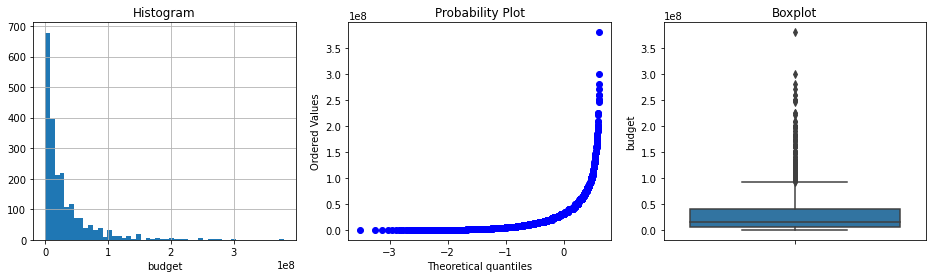

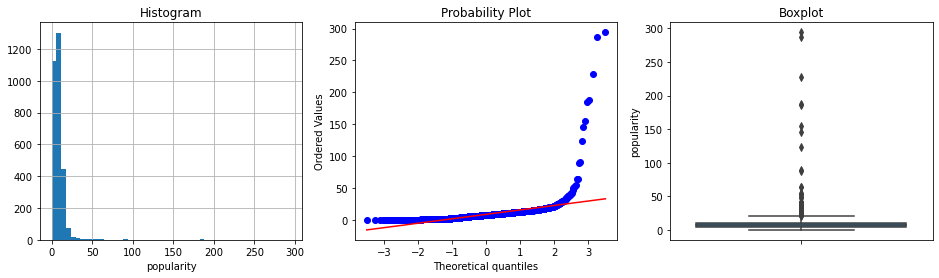

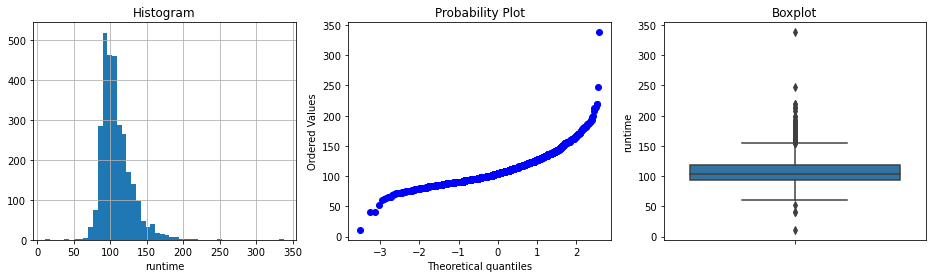

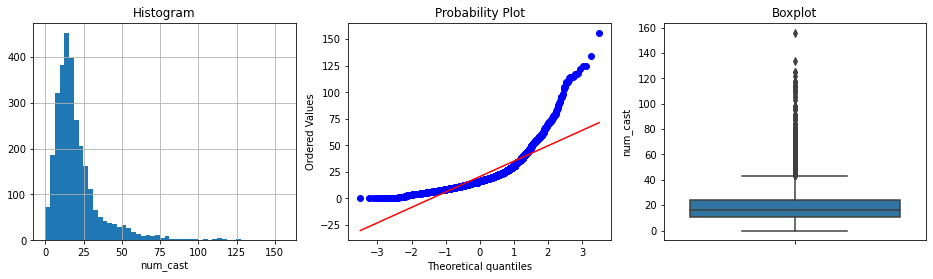

In [18]:
for var in num_vars:
    num_plots(data, var)

- `budget` shows skewed distribution towards the right.
- `popularity` indicates right-skewed distribution.
- `runtime` has Gaussian distribution.
- `num_cast` shows right-skewed distribution.

### Temporal variables

We have year, month, and dayofweek variables in the dataset

In [22]:
data[['release_year', 'release_month', 'release_day', 'release_dayofweek']].head()

,release_year,release_month,release_day,release_dayofweek
0,2015,2,20,4
1,2004,8,6,4
2,2014,10,10,4
3,2012,3,9,4
4,2009,2,5,3


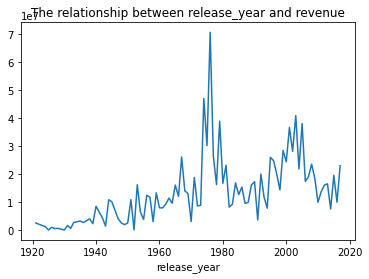

In [23]:
data.groupby('release_year')['revenue'].median().plot();
plt.title('The relationship between release_year and revenue');

It shows two peaks: between 1970 to 1980 and between 1990 and 2010. 